In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Задание 1

In [2]:
ml = pd.read_csv('ml-latest\\ratings.csv')

In [3]:
%%time
best_film = ml.query('rating == 5.')['movieId'].value_counts().idxmax()

Wall time: 870 ms


In [4]:
movies_names = pd.read_csv('ml-latest\\movies.csv')

In [5]:
print(movies_names.query('movieId == {}'.format(best_film)))

     movieId                             title       genres
315      318  Shawshank Redemption, The (1994)  Crime|Drama


## Задание 2

In [6]:
%%time
power_frame = pd.read_csv('power.csv')

power_frame.query('country in ["Lithuania", "Latvia", "Estonia"] & quantity > 0 & category in [4, 12, 21]\
                 & year >= 2005 & year <= 2010')['quantity'].sum()

Wall time: 700 ms


240580.0

## Задание 3

In [7]:
bf = pd.DataFrame(pd.read_html("http://bridgesport.ru/rate/r20190801.htm")[0])
bf['Разряд'] = bf['Разряд'].str.strip('*').astype(float) # В оригинальной таблице есть * в столбце разряд. Это значит, что он временный
#Ни на что особо не влияет, но мешает импортировать столбец как число, что не удобно
bf.info()
print(bf.head()) #Продолжу Holly War - без принта Head будет перезаписан на экране после выпонения Describe :) Я за явность :)
bf.describe() #Я свой выбор сделал, оставлю здесь пока так для обоснования, потом исправлюсь :)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 6 columns):
#               614 non-null int64
Фамилия И.О.    614 non-null object
Разряд          614 non-null float64
Город           614 non-null object
Рейтинг         614 non-null int64
ПБ              614 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 28.9+ KB
   #  Фамилия И.О.  Разряд         Город  Рейтинг    ПБ
0  1  Матушко Г.В.    -5.0        Троицк     5514   637
1  2   Громов А.В.    -5.0        Москва     5462  1240
2  3    Орлов С.Ю.    -4.5          Тула     5101   475
3  4  Гулевич А.С.    -4.5         Тверь     4868   287
4  5   Хохлов Ю.В.    -5.0  С.-Петербург     4816   489


,#,Разряд,Рейтинг,ПБ
count,614.000000,614.000000,614.000000,614.000000
mean,307.500000,-0.048046,612.008143,34.110749
std,177.390811,1.971706,969.135424,96.790927
min,1.000000,-5.000000,1.000000,0.000000
25%,154.250000,-1.500000,31.000000,0.000000
50%,307.500000,0.000000,160.000000,3.000000
75%,460.750000,1.000000,786.750000,26.750000
max,614.000000,5.000000,5514.000000,1240.000000


## Задание 3*
### Пройтись по всем аналогичным файлам и построить график средних занчений. Раньше января 2015 года данные не релевантны - произошла смена оценок

In [8]:
str_start = 'http://bridgesport.ru/rate/r'
str_end = '01.htm'
stat_DF = pd.DataFrame(columns=['Разряд','Рейтинг','ПБ'])

for year in range(2014, 2019):
    for month in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']:
        link = f'{str_start}{year}{month}{str_end}'
        #print(link)
        cur_list = pd.DataFrame(pd.read_html(link)[0])
        cur_list['Разряд'] = cur_list['Разряд'].str.strip('*').astype(float) #remove *
        stat_DF = stat_DF.append(cur_list.mean()[['Разряд', 'Рейтинг', 'ПБ']], ignore_index=True)



In [9]:
stat_DF['Разряд'] = stat_DF['Разряд']*10
stat_DF['Рейтинг'] = stat_DF['Рейтинг'] / 100
stat_DF['ПБ'] = stat_DF['ПБ'] / 10 #Ручная нормализация :)



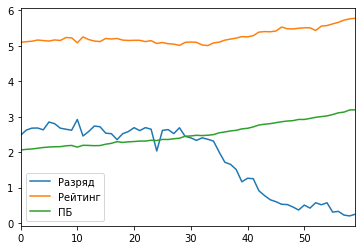

     Разряд   Рейтинг        ПБ
0  2.475884  5.099019  2.061576
1  2.623397  5.116891  2.080128
2  2.678914  5.130288  2.091534
3  2.682035  5.163816  2.110811
4  2.630573  5.149236  2.132325


In [10]:

stat_DF.plot()
plt.show()
print(stat_DF.head())